<a href="https://colab.research.google.com/github/Sirmuchai/Data-Wrangling-with-R/blob/main/Week_3_Project_1_Data_Wrangling_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling with R Project

## Background Information
MTN Telecom offers mobile and internet services to its customers. These services include phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies. The management would like your assistance in understanding the subscribed customers. Your recommendations informed by your analysis will help them make decisions on effective customer retention programs.

## Dataset Information
The provided customer data set includes information about:

- Customers who left within the last month – the column is called Churn.
- The services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
- The demographic information about customers – gender, age range, and if they have partners and dependents.

Each row represents a customer, and each column contains the customer’s attributes described on the column Metadata.

Dataset URL: https://bit.ly/2ZlpzjF

## Problem Statement
Read, explore, clean, and analyze the dataset.

## Experimental Design

- Install and Load Packages
- Import Data
- Data Understanding
- Standardisation
- Handle Irrelevant Data
- Find and Deal with Duplicates
- Find and Handle Missing data
- Find and Deal with Outliers

## Step 1. Install and Load Packages 
In R, packages are a collection of functions that provide functinalities not given by the R core functionalities. We'll install tidyverse packages which will provide us with packages for performing data manipulation and analysis.

In [ ]:
# Let's install tidyverse packages in Rstudio
#install.packages("tidyverse")

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Step 2. Import Data

To work with a dataset, we need to import it and understand its structure. 

In [ ]:
customer_df <- read_csv("https://bit.ly/2ZlpzjF")

Rows: 7050 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): customerID, GENDER, PARTNER, Dependents, PhoneService, MultipleLin...
dbl  (4): SeniorCitizen, tenure, MonthlyCharges, TotalCharges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Step 3. Data Understanding

In [ ]:
# Preview the first 6 records of the dataset
head(customer_df)

customerID,GENDER,SeniorCitizen,PARTNER,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TECHSUPPORT,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [ ]:
# Preview the last 6 records of the dataset
tail(customer_df)

customerID,GENDER,SeniorCitizen,PARTNER,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TECHSUPPORT,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,⋯,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,⋯,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [ ]:
# Let's check the variable names, datatypes and first few records of each variable using the `glimpse()` function
glimpse(customer_df)

Rows: 7,050
Columns: 21
$ customerID       <chr> "7590-VHVEG", "5575-GNVDE", "3668-QPYBK", "7795-CFOCW…
$ GENDER           <chr> "Female", "Male", "Male", "Male", "Female", "Female",…
$ SeniorCitizen    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ PARTNER          <chr> "Yes", "No", "No", "No", "No", "No", "No", "No", "Yes…
$ Dependents       <chr> "No", "No", "No", "No", "No", "No", "Yes", "No", "No"…
$ tenure           <dbl> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 2…
$ PhoneService     <chr> "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", …
$ MultipleLines    <chr> "No phone service", "No", "No", "No phone service", "…
$ InternetService  <chr> "DSL", "DSL", "DSL", "DSL", "Fiber optic", "Fiber opt…
$ OnlineSecurity   <chr> "No", "Yes", "Yes", "Yes", "No", "No", "No", "Yes", "…
$ OnlineBackup     <chr> "Yes", "No", "Yes", "No", "No", "No", "Yes", "No", "N…
$ DeviceProtection <chr> "No", "Yes", "No", "Yes", "No", "Yes", "No", "No", "Y…
$ TECHSUPPORT   

In [ ]:
# Let's display more information about the datatypes using the `str()` function
str(customer_df)

spc_tbl_ [7,050 × 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ customerID      : chr [1:7050] "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ GENDER          : chr [1:7050] "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : num [1:7050] 0 0 0 0 0 0 0 0 0 0 ...
 $ PARTNER         : chr [1:7050] "Yes" "No" "No" "No" ...
 $ Dependents      : chr [1:7050] "No" "No" "No" "No" ...
 $ tenure          : num [1:7050] 1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr [1:7050] "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr [1:7050] "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr [1:7050] "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr [1:7050] "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr [1:7050] "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr [1:7050] "No" "Yes" "No" "Yes" ...
 $ TECHSUPPORT     : chr [1:7050] "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr [1:7050] "No" "No" "No" "No" ...
 $ StreamingMovies : chr [1:7050] "

In [ ]:
# Let's see a random sample of the dataset
sample_n(customer_df, 10)

customerID,GENDER,SeniorCitizen,PARTNER,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TECHSUPPORT,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
3719-TDVQB,Female,1,Yes,No,54,Yes,No,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,18.95,1031.10,No
9067-SQTNS,Male,0,Yes,Yes,44,Yes,No,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.60,926.00,No
5294-CDGWY,Male,0,Yes,Yes,51,No,No phone service,DSL,Yes,⋯,Yes,No,Yes,Yes,One year,No,Electronic check,59.30,3014.65,Yes
9618-LFJRU,Female,0,No,No,4,Yes,No,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.45,82.85,No
7576-JMYWV,Female,1,Yes,Yes,46,Yes,Yes,Fiber optic,Yes,⋯,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,110.20,4972.10,No
7501-IWUNG,Female,0,Yes,Yes,61,Yes,No,DSL,No,⋯,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),73.80,4616.05,No
4439-JMPMT,Female,0,Yes,Yes,5,Yes,No,Fiber optic,No,⋯,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,85.75,470.95,Yes
0661-WCQNQ,Male,0,Yes,No,22,Yes,No,DSL,Yes,⋯,No,Yes,No,No,One year,Yes,Credit card (automatic),56.25,1292.20,No
5204-QZXPU,Male,0,No,No,19,No,No phone service,DSL,No,⋯,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35,Yes


In [ ]:
# Let's check the size of the dataset without displaying additional information
dim(customer_df)

[1] 7050   21

* **Observation:** Most of the columns appear to have categorical data

## Step 4. Standardisation

In [ ]:
# Let's check the dataset column names
names(customer_df)

[1] "customerID"       "GENDER"           "SeniorCitizen"    "PARTNER"         
 [5] "Dependents"       "tenure"           "PhoneService"     "MultipleLines"   
 [9] "InternetService"  "OnlineSecurity"   "OnlineBackup"     "DeviceProtection"
[13] "TECHSUPPORT"      "StreamingTV"      "StreamingMovies"  "Contract"        
[17] "PaperlessBilling" "PaymentMethod"    "MonthlyCharges"   "TotalCharges"    
[21] "Churn"

In [ ]:
# Strip the leading and trailing spaces using the `trimws()` function
# For the arguments, we pass the column names vector and a vector with value "both" that defines that the leading and trailing spaces will be stripped. Note that this method transforms underscores to period
names(customer_df) <- trimws(names(customer_df), which = c("both"))
names(customer_df)

[1] "customerID"       "GENDER"           "SeniorCitizen"    "PARTNER"         
 [5] "Dependents"       "tenure"           "PhoneService"     "MultipleLines"   
 [9] "InternetService"  "OnlineSecurity"   "OnlineBackup"     "DeviceProtection"
[13] "TECHSUPPORT"      "StreamingTV"      "StreamingMovies"  "Contract"        
[17] "PaperlessBilling" "PaymentMethod"    "MonthlyCharges"   "TotalCharges"    
[21] "Churn"

In [ ]:
# Let's transform all column names to have lowercase characters using the `tolower()` function. 
# We pass a vector containing the column names

names(customer_df) <- tolower(names(customer_df))
names(customer_df)

[1] "customerid"       "gender"           "seniorcitizen"    "partner"         
 [5] "dependents"       "tenure"           "phoneservice"     "multiplelines"   
 [9] "internetservice"  "onlinesecurity"   "onlinebackup"     "deviceprotection"
[13] "techsupport"      "streamingtv"      "streamingmovies"  "contract"        
[17] "monthlycharges"   "totalcharges"     "churn"

## Step 5. Handle Irrelevant Data

We will drop columns that will not be useful in our analysis.


In [ ]:
# Let's drop the paymentmethod and paperlessbilling columns using the `select()` function 
# We use `-` operator to define the column names we don't want.

customer_df = select(customer_df, -c("paymentmethod", "paperlessbilling"))

ERROR: ignored

## Step 6. Find and Deal with Duplicates 

Sometimes duplicates can mislead our analysis. Let's find and leave them out from our dataset.

In [ ]:
dim(customer_df)

[1] 7050   19

In [ ]:
# Extract the duplicated records from the dataset
# We use x[duplicated(x),], where x is the dataframe

customer_df[duplicated(customer_df), ]

customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
6876-ADESB,Male,0,No,Yes,1,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,48.95,48.95,Yes
1427-VERSM,Female,0,Yes,No,56,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,98.70,5669.50,No
3967-KXAPS,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,92.30,6719.90,No
3967-KXAPS,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,92.30,6719.90,No
2314-TNDJQ,Female,0,Yes,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,55.65,3880.05,No
2314-TNDJQ,Female,0,Yes,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,55.65,3880.05,No
4501-VCPFK,Male,0,No,No,26,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,35.75,1022.50,No


* **Observation**: Only 7 records are duplicated

In [ ]:
# Let's drop the duplicates by adding a logical negation `!` infront of the duplicated function
customer_df <- customer_df[!duplicated(customer_df), ]

dim(customer_df)

[1] 7043   19

## Step 7. Missing data

To avoid wrong data analysis conclusions, we will find and handle missing data.


### 7.1 Find missing values

In [ ]:
# Find the total missing values in each column using the `colSums()` function
colSums(is.na(customer_df))

customerid           gender    seniorcitizen          partner 
               0                1                3               12 
      dependents           tenure     phoneservice    multiplelines 
              10               11               15               17 
 internetservice   onlinesecurity     onlinebackup deviceprotection 
              16               16               15               14 
     techsupport      streamingtv  streamingmovies         contract 
              13               13               12               12 
  monthlycharges     totalcharges            churn 
              12               23               12

* **Observation**: all columns have missing data except the customerid column. The totalcharges column has the most missing values.

### 7.2 Handle missing values
There are various ways of handling missing data. These include but not limited to dropping all rows containing missing values AND imputing the missing values in a column with a number/mean/median/etc.

In [ ]:
# Let's drop all records containing missing values using the na.omit() function
clean_df <- na.omit(customer_df)
dim(clean_df)

[1] 7003   19

## Step 8. Find and Deal with Outliers

Outliers can have impact on the quality of analysis. Let's find and remove outliers from the dataset.

In [ ]:
# Let's convert categorical values to numerical values
MakeNum <- function(x) as.numeric(as.factor(x))

clean_df <- mutate(clean_df, across(c(2,4,5,7,8,9,10,11,12,13,14,15,16,19), MakeNum))

clean_df

customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7590-VHVEG,1,0,2,1,1,1,2,1,1,3,1,1,1,1,1,29.85,29.85,1
5575-GNVDE,2,0,1,1,34,2,1,1,3,1,3,1,1,1,2,56.95,1889.50,1
3668-QPYBK,2,0,1,1,2,2,1,1,3,3,1,1,1,1,1,53.85,108.15,2
7795-CFOCW,2,0,1,1,45,1,2,1,3,1,3,3,1,1,2,42.30,1840.75,1
9237-HQITU,1,0,1,1,2,2,1,2,1,1,1,1,1,1,1,70.70,151.65,2
9305-CDSKC,1,0,1,1,8,2,3,2,1,1,3,1,3,3,1,99.65,820.50,2
1452-KIOVK,2,0,1,2,22,2,3,2,1,3,1,1,3,1,1,89.10,1949.40,1
6713-OKOMC,1,0,1,1,10,1,2,1,3,1,1,1,1,1,1,29.75,301.90,1
7892-POOKP,1,0,2,1,28,2,3,2,1,1,3,3,3,3,1,104.80,3046.05,2


[1] "gender"           "seniorcitizen"    "partner"          "dependents"      
 [5] "tenure"           "phoneservice"     "multiplelines"    "internetservice" 
 [9] "onlinesecurity"   "onlinebackup"     "deviceprotection" "techsupport"     
[13] "streamingtv"      "streamingmovies"  "contract"         "monthlycharges"  
[17] "totalcharges"

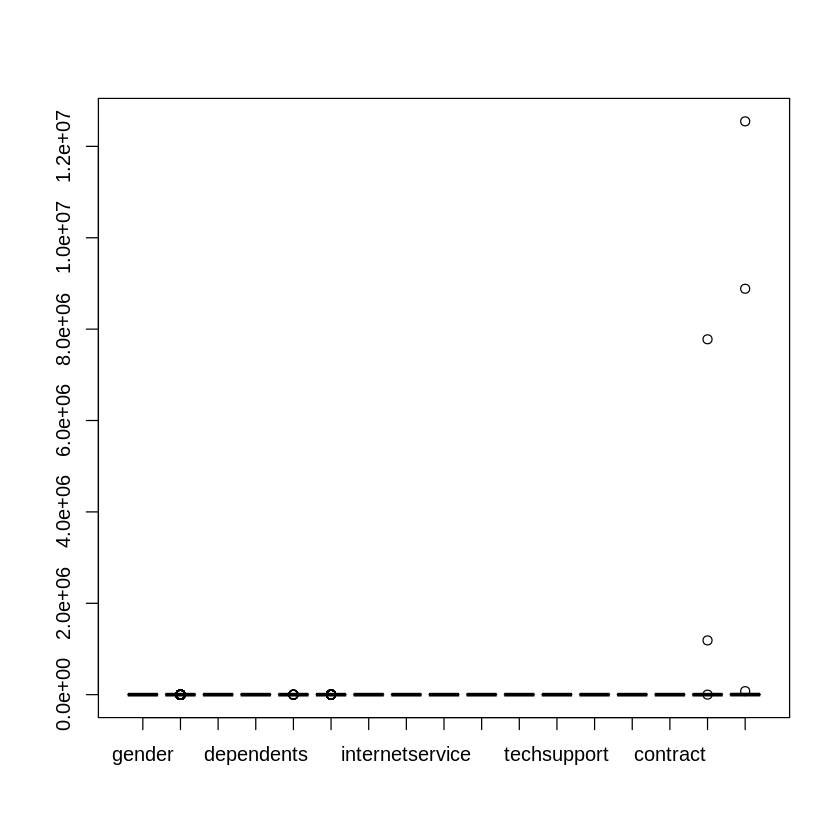

In [ ]:
# We will exclude churn and customerid columns
cols <- c(names(clean_df))
cols <- cols[-19]
cols <- cols[-1]
cols

# Use BoxPlot to detect outliers in the numeric/continuous data columns
boxplot(clean_df[,cols])

**Observation**: our dataset has outliers


In [ ]:
# Let's create 2 helper functions, one to detect outliers and another to remove outlier
detect_outlier <- function(x) {
  # calculate first quantile
  Q1 <- quantile(x, probs=.25)
   
  # calculate third quantile
  Q3 <- quantile(x, probs=.75)
   
  # calculate interquartile range
  IQR = Q3 - Q1
   
  # if an observation is greater than 1.5 times the third quantile or less than 1.5 times the first quantile, it returns true.
  x > Q3 + (IQR*1.5) | x < Q1 - (IQR*1.5)
}

In [ ]:
remove_outliers <- function(dataframe, columns=names(dataframe)) {
  # for loop to traverse in columns vector
  for (col in columns) {
    # remove observation if it satisfies outlier function
    dataframe <- dataframe[!detect_outlier(dataframe[[col]]), ]
  }
   
  # return dataframe
  return(dataframe)
}

In [ ]:
print("Shape before removing outliers")
print(dim(clean_df))

cols <- names(clean_df)
cols <- cols[-19]
cols <- cols[-1]

df_without_outliers <- remove_outliers(clean_df, cols)

print("Shape after removing outliers")
print(dim(df_without_outliers))

[1] "Shape before removing outliers"
[1] 7003   19
[1] "Shape after removing outliers"
[1] 5283   19


[1] "gender"           "seniorcitizen"    "partner"          "dependents"      
 [5] "tenure"           "phoneservice"     "multiplelines"    "internetservice" 
 [9] "onlinesecurity"   "onlinebackup"     "deviceprotection" "techsupport"     
[13] "streamingtv"      "streamingmovies"  "contract"         "monthlycharges"  
[17] "totalcharges"

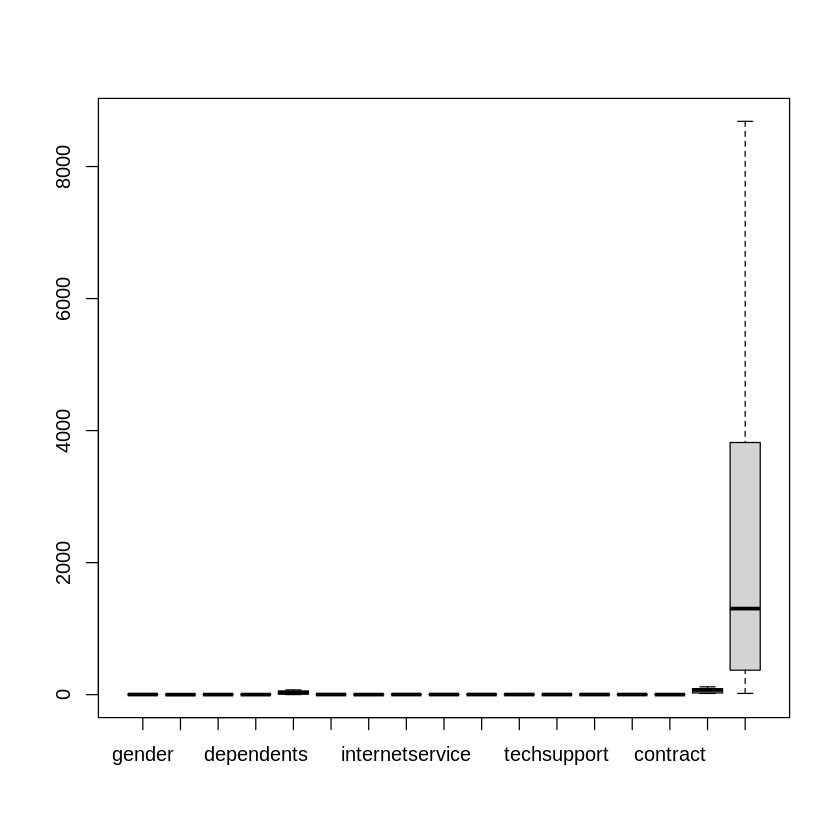

In [ ]:
# Let's confirm that our new dataset doesn't have outliers
cols <- c(names(df_without_outliers))
cols <- cols[-19]
cols <- cols[-1]
cols

# Use BoxPlot to detect outliers in the numeric/continuous data columns
boxplot(df_without_outliers[,cols])


Observation: all outliers are gone